In [1]:
import pandas as pd
from sklearn.datasets import load_digits
model = load_digits()

In [2]:
df = pd.DataFrame(model.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


<Figure size 640x480 with 0 Axes>

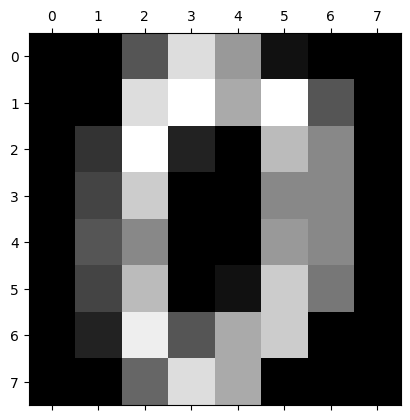

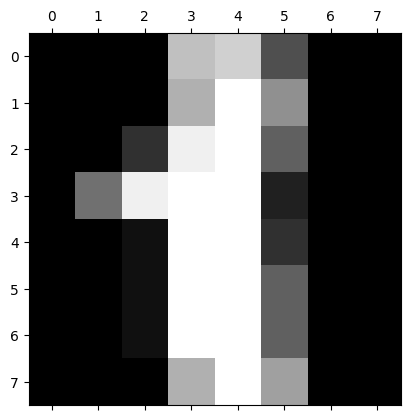

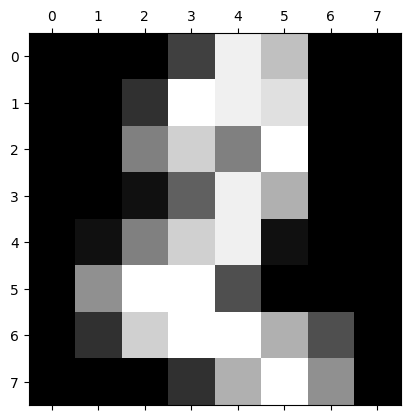

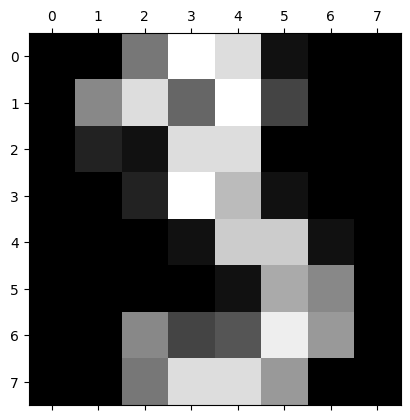

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range (4):
   plt.matshow(model.images[i])


In [16]:
df['target']=model.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [20]:
new_df = df.drop(['target'],axis='columns')
from sklearn.model_selection import train_test_split
x_tarin,x_test,y_train,y_test = train_test_split(new_df,df['target'],test_size=0.2)

In [27]:
from sklearn.ensemble import RandomForestClassifier
n_model = RandomForestClassifier(n_estimators=1000)
n_model.fit(x_tarin,y_train)

RandomForestClassifier(n_estimators=1000)

In [28]:
n_model.score(x_test,y_test)

0.9833333333333333

In [29]:
y_predicted = n_model.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 38,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  2, 35]])

Text(95.72222222222221, 0.5, 'Truth')

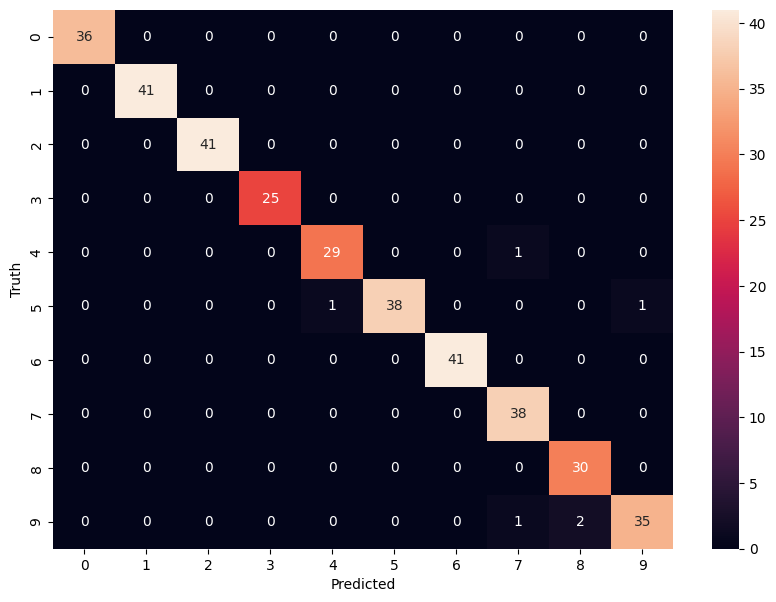

In [31]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')